# Map Making with Basemap

In [1]:
# based on https://rabernat.github.io/research_computing/intro-to-basemap.html

In [2]:
# Starting configuration

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [ ]:
# An introduction to map projection:
# https://brilliantmaps.com/xkcd/

![Map Projection](https://mk0brilliantmaptxoqs.kinstacdn.com/wp-content/uploads/xkcd_map_projections.png)

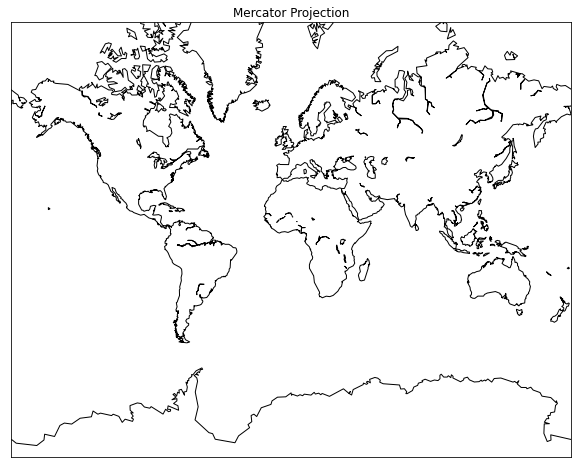

In [5]:
# First example create mercator projection plot of the continents.
# The Mercator projection is a cylindrical map projection 

fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
plt.title("Mercator Projection")
plt.show()

Text(0.5, 1.0, 'Mercator Projection')

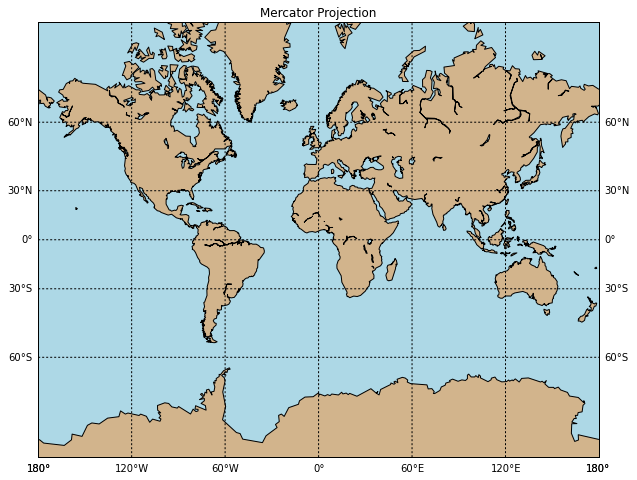

In [12]:
# add some settings

fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
plt.title("Mercator Projection")

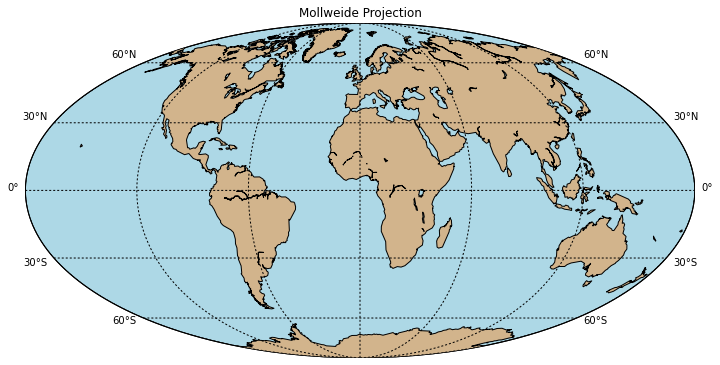

In [13]:
# same settings, different projection

fig = plt.figure(num=None, figsize=(12, 8) )
m = Basemap(projection='moll',lon_0=0,resolution='c')    
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,False],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
plt.title("Mollweide Projection");

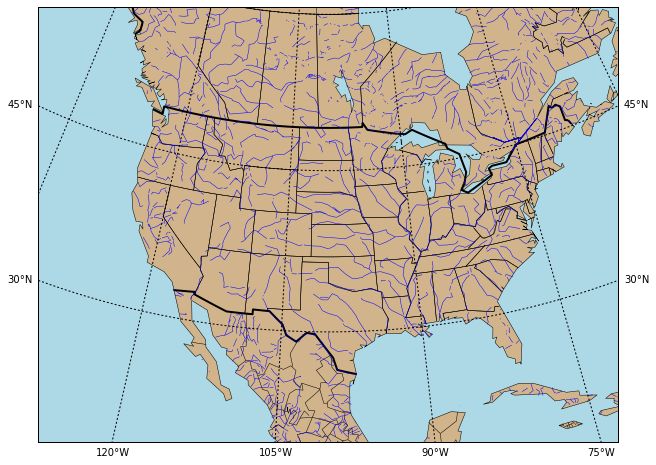

In [14]:
# Map with state boundaries and river

fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' )      # draw countries
m.drawstates(linewidth=0.5, linestyle='solid', color='k')        # draw states boundaries
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')     # draw rivers 

In [15]:
# Adding great circle path and text labels at two locations

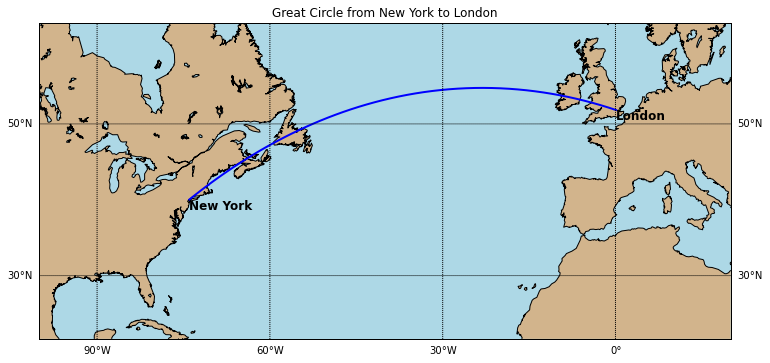

In [16]:
# create new figure, axes instances.
fig=plt.figure(figsize=(12, 8) )
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])


# When you use regular matplotlib commands, you need to get the mapping from the
# map projection to x,y that matplotlib uses. This is accomplished using the Basemap object,
# here which is assigned to be m()
x, y = m(lonlon, lonlat)  
plt.text(x, y, 'London',fontsize=12,fontweight='bold', ha='left',va='top',color='k')

x, y = m(nylon, nylat)  
plt.text(x, y, 'New York',fontsize=12,fontweight='bold',ha='left',va='top',color='k')

ax.set_title('Great Circle from New York to London');

In [17]:
# read in a recent WW3 model and plot up the significant wave height
# taken from the NOAA Wave Watch III website (https://polar.ncep.noaa.gov/waves/examples/usingpython.shtml).

<Figure size 432x288 with 0 Axes>

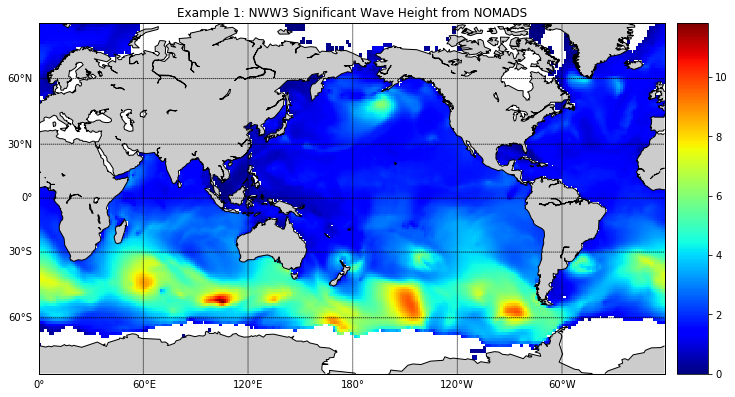

In [8]:
import netCDF4

# set up the figure
plt.figure()

# set up the URL to access the data server.
# See the NWW3 directory on NOMADS 
# for the list of available model run dates.

mydate='20200601'  # this needs to be a recent data since only recent models are available for download
url='https://nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ mydate+'/nww3'+mydate+'_00z'

# Extract the significant wave height of combined wind waves and swell

file = netCDF4.Dataset(url)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][1,:,:]
file.close()

# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig=plt.figure(figsize=(12, 8) )

# Miller projection:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')


# convert the lat/lon values to x/y projections.

x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Example 1: NWW3 Significant Wave Height from NOMADS');